In [1]:
# Dependencies and Setup
import pandas as pd

# File to Load 
file_to_load = "chicago_populationdata.csv"

# Read csv File and store into Pandas data frame
chicago_pop = pd.read_csv(file_to_load)
chicago_pop

,ID Race,Race,ID Ethnicity,Ethnicity,ID Year,Year,Hispanic Population Moe,Geography,ID Geography,Slug Geography,Population,share
0,1,Black or African American Alone,0,Not Hispanic or Latino,2018,2018,11727.000000,"Chicago, IL",16000US1714000,chicago-il,784266,0.289826
1,6,Two or More Races,1,Hispanic or Latino,2018,2018,3962.520536,"Chicago, IL",16000US1714000,chicago-il,26453,0.009776
2,0,White Alone,0,Not Hispanic or Latino,2018,2018,15232.000000,"Chicago, IL",16000US1714000,chicago-il,899980,0.332588
3,5,Some Other Race Alone,1,Hispanic or Latino,2018,2018,16083.000000,"Chicago, IL",16000US1714000,chicago-il,240252,0.088785
4,0,White Alone,1,Hispanic or Latino,2018,2018,16765.000000,"Chicago, IL",16000US1714000,chicago-il,489985,0.181074
...,...,...,...,...,...,...,...,...,...,...,...,...
79,5,Some Other Race Alone,1,Hispanic or Latino,2013,2013,13933.000000,"Chicago, IL",16000US1714000,chicago-il,290196,0.106737
80,1,Black or African American Alone,1,Hispanic or Latino,2013,2013,2792.000000,"Chicago, IL",16000US1714000,chicago-il,11023,0.004054
81,4,Native Hawaiian & Other Pacific Islander Alone,0,Not Hispanic or Latino,2013,2013,271.000000,"Chicago, IL",16000US1714000,chicago-il,663,0.000244
82,1,Black or African American Alone,0,Not Hispanic or Latino,2013,2013,10446.000000,"Chicago, IL",16000US1714000,chicago-il,852519,0.313566


In [2]:
chicago_pop.columns = map(str.lower, chicago_pop.columns)
chicago_pop.columns = ['id_race', 'race', 'id_eth', 'ethnicity', 'id_year', 'year',
       'hispanic_pop', 'geography', 'id_geography',
       'slug_geography', 'population', 'share']
chicago_pop

,id_race,race,id_eth,ethnicity,id_year,year,hispanic_pop,geography,id_geography,slug_geography,population,share
0,1,Black or African American Alone,0,Not Hispanic or Latino,2018,2018,11727.000000,"Chicago, IL",16000US1714000,chicago-il,784266,0.289826
1,6,Two or More Races,1,Hispanic or Latino,2018,2018,3962.520536,"Chicago, IL",16000US1714000,chicago-il,26453,0.009776
2,0,White Alone,0,Not Hispanic or Latino,2018,2018,15232.000000,"Chicago, IL",16000US1714000,chicago-il,899980,0.332588
3,5,Some Other Race Alone,1,Hispanic or Latino,2018,2018,16083.000000,"Chicago, IL",16000US1714000,chicago-il,240252,0.088785
4,0,White Alone,1,Hispanic or Latino,2018,2018,16765.000000,"Chicago, IL",16000US1714000,chicago-il,489985,0.181074
...,...,...,...,...,...,...,...,...,...,...,...,...
79,5,Some Other Race Alone,1,Hispanic or Latino,2013,2013,13933.000000,"Chicago, IL",16000US1714000,chicago-il,290196,0.106737
80,1,Black or African American Alone,1,Hispanic or Latino,2013,2013,2792.000000,"Chicago, IL",16000US1714000,chicago-il,11023,0.004054
81,4,Native Hawaiian & Other Pacific Islander Alone,0,Not Hispanic or Latino,2013,2013,271.000000,"Chicago, IL",16000US1714000,chicago-il,663,0.000244
82,1,Black or African American Alone,0,Not Hispanic or Latino,2013,2013,10446.000000,"Chicago, IL",16000US1714000,chicago-il,852519,0.313566


In [3]:
chicago_pop_2018 = chicago_pop.loc[chicago_pop['id_year'] == 2018,["race","ethnicity","hispanic_pop","population"]]
chicago_pop_2018

,race,ethnicity,hispanic_pop,population
0,Black or African American Alone,Not Hispanic or Latino,11727.000000,784266
1,Two or More Races,Hispanic or Latino,3962.520536,26453
2,White Alone,Not Hispanic or Latino,15232.000000,899980
3,Some Other Race Alone,Hispanic or Latino,16083.000000,240252
4,White Alone,Hispanic or Latino,16765.000000,489985
5,Some Other Race Alone,Not Hispanic or Latino,2863.000000,8185
6,Native Hawaiian & Other Pacific Islander Alone,Hispanic or Latino,253.000000,254
7,Two or More Races,Not Hispanic or Latino,6175.027287,54227
8,Native Hawaiian & Other Pacific Islander Alone,Not Hispanic or Latino,288.000000,247
9,Black or African American Alone,Hispanic or Latino,3285.000000,13223


In [4]:
chicago_race = chicago_pop_2018.groupby('race',as_index=True)
race_count = pd.DataFrame(chicago_race['population'].sum())

In [5]:
race_count.index

Index(['American Indian & Alaska Native Alone', 'Asian Alone',
       'Black or African American Alone',
       'Native Hawaiian & Other Pacific Islander Alone',
       'Some Other Race Alone', 'Two or More Races', 'White Alone'],
      dtype='object', name='race')

In [6]:
chicago_ethnicity = chicago_pop_2018.groupby('ethnicity',as_index=True)
ethnicity_count = pd.DataFrame(chicago_ethnicity['population'].sum())

In [11]:
#export to csv
race_count.to_csv("race_chicago.csv")
ethnicity_count.to_csv("ethinicity_chicago.csv")

In [12]:
# File to Load 
file_to_load = "covid_chicago.csv"

# Read csv File and store into Pandas data frame
results_df = pd.read_csv(file_to_load)
results_df

,Unnamed: 0,cases_age_0_17,cases_age_18_29,cases_age_30_39,cases_age_40_49,cases_age_50_59,cases_age_60_69,cases_age_70_79,cases_age_80_,cases_age_unknown,...,deaths_female,deaths_latinx,deaths_male,deaths_other_non_latinx,deaths_total,deaths_unknown_age,deaths_unknown_gender,deaths_unknown_race_eth,deaths_white_non_latinx,lab_report_date
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2020-07-22T00:00:00.000
1,1,4,13,13,12,4,5,6,4,1,...,0,0,0,0,0,0,0,0,0,2020-07-21T00:00:00.000
2,2,17,31,33,21,15,11,8,2,0,...,1,0,0,0,1,0,0,0,0,2020-07-20T00:00:00.000
3,3,9,14,16,10,10,4,4,2,0,...,1,1,1,0,2,0,0,0,0,2020-07-19T00:00:00.000
4,4,11,23,18,13,14,6,5,1,0,...,0,1,2,0,2,0,0,0,1,2020-07-18T00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,138,0,0,0,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2020-03-06T00:00:00.000
139,139,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2020-03-05T00:00:00.000
140,140,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2020-02-28T00:00:00.000
141,141,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2020-01-21T00:00:00.000


In [13]:
# Case by race dataframe
case_by_race_df = results_df[["lab_report_date",
                      "cases_total",
                      "cases_latinx",
                      "cases_asian_non_latinx",
                      "cases_black_non_latinx",
                      "cases_white_non_latinx",
                      "cases_other_non_latinx",
                     "cases_unknown_race_eth"]]

# Clean the data by dropping empty row
case_by_race_df = case_by_race_df.dropna(how = "any")

# Change data type from str to int
cols = case_by_race_df.columns.drop("lab_report_date")
case_by_race_df[cols] = case_by_race_df[cols].apply(pd.to_numeric, errors='coerce')

# Remove time from date&time variable
case_by_race_df["lab_report_date"] = pd.to_datetime(case_by_race_df["lab_report_date"]).dt.date

In [14]:
# Calculate the cumulative cases of each race
cul_latinx_case = case_by_race_df["cases_latinx"].sum()
cul_asian_case = case_by_race_df["cases_asian_non_latinx"].sum()
cul_black_case = case_by_race_df["cases_black_non_latinx"].sum()
cul_white_case = case_by_race_df["cases_white_non_latinx"].sum()
cul_other_case = case_by_race_df["cases_other_non_latinx"].sum()
cul_unknown_case = case_by_race_df["cases_unknown_race_eth"].sum()


In [15]:
death_by_race_df = results_df[["lab_report_date",
                      "deaths_total",
                      "deaths_latinx",
                      "deaths_asian_non_latinx",
                      "deaths_black_non_latinx",
                      "deaths_white_non_latinx",
                      "deaths_other_non_latinx",
                     "deaths_unknown_race_eth"]]

In [16]:
# Clean the data by dropping empty row
death_by_race_df = death_by_race_df.dropna(how = "any")

In [17]:
# Change data type from str to int
cols = death_by_race_df.columns.drop("lab_report_date")
death_by_race_df[cols] = death_by_race_df[cols].apply(pd.to_numeric, errors='coerce')

In [18]:
# Remove time from date&time variable
death_by_race_df["lab_report_date"] = pd.to_datetime(death_by_race_df["lab_report_date"]).dt.date

In [19]:
# Calculate the cumulative deaths of each race
cul_latinx_death = death_by_race_df["deaths_latinx"].sum()
cul_asian_death = death_by_race_df["deaths_asian_non_latinx"].sum()
cul_black_death = death_by_race_df["deaths_black_non_latinx"].sum()
cul_white_death = death_by_race_df["deaths_white_non_latinx"].sum()
cul_other_death = death_by_race_df["deaths_other_non_latinx"].sum()
cul_unknown_death = death_by_race_df["deaths_unknown_race_eth"].sum()

In [20]:
lst = [['latinx', cul_latinx_case, cul_latinx_death], ['asian', cul_asian_case, cul_asian_death],
      ['black',cul_black_case,cul_black_death], ['white',cul_white_case, cul_white_death],
       ['other', cul_other_case, cul_other_death],['unknown',cul_unknown_case,cul_unknown_death]]
    
covid_df = pd.DataFrame(lst, columns =['race', 'chicago_cases', 'chicago_deaths'], dtype = float) 
covid_df 

,race,chicago_cases,chicago_deaths
0,latinx,21682.0,888.0
1,asian,1244.0,120.0
2,black,13808.0,1175.0
3,white,7035.0,521.0
4,other,2357.0,20.0
5,unknown,11435.0,12.0


In [21]:
race_count['race']= ['other', 'asian', 'black', 'other', 'other', 'other', 'white']
race_count

,population,race
race,,
American Indian & Alaska Native Alone,7237,other
Asian Alone,181679,asian
Black or African American Alone,797489,black
Native Hawaiian & Other Pacific Islander Alone,501,other
Some Other Race Alone,248437,other
Two or More Races,80680,other
White Alone,1389965,white


In [22]:
race_count.reset_index(drop=True, inplace=True)
race_count

,population,race
0,7237,other
1,181679,asian
2,797489,black
3,501,other
4,248437,other
5,80680,other
6,1389965,white


In [23]:
ethnicity_count['race']=['latinx', 'not latinx']
ethnicity_count.reset_index(drop=True, inplace=True)
ethnicity_count

,population,race
0,776661,latinx
1,1929327,not latinx


In [24]:
race_ethn_merge = race_count.append(ethnicity_count)
race_ethn_merge=race_ethn_merge[race_ethn_merge['race'] != 'not latinx']
race_ethn=race_ethn_merge.groupby("race").sum()
race_ethn

,population
race,
asian,181679
black,797489
latinx,776661
other,336855
white,1389965


In [25]:
# Combine the data into a single dataset
covid_chicago_pop = pd.merge(covid_df, race_ethn, how='inner', on='race')
covid_chicago_pop

,race,chicago_cases,chicago_deaths,population
0,latinx,21682.0,888.0,776661
1,asian,1244.0,120.0,181679
2,black,13808.0,1175.0,797489
3,white,7035.0,521.0,1389965
4,other,2357.0,20.0,336855


In [26]:
covid_chicago_pop['prop_cases'] = covid_chicago_pop['chicago_cases']/covid_chicago_pop['population']
covid_chicago_pop['rel_cases_per1000'] = covid_chicago_pop['prop_cases']*1000
covid_chicago_pop['prop_deaths'] = covid_chicago_pop['chicago_deaths']/covid_chicago_pop['population']
covid_chicago_pop['deaths_per1000'] = covid_chicago_pop['prop_deaths']*1000
covid_chicago_pop

,race,chicago_cases,chicago_deaths,population,prop_cases,cases_per1000,prop_deaths,deaths_per1000
0,latinx,21682.0,888.0,776661,0.027917,27.916942,0.001143,1.143356
1,asian,1244.0,120.0,181679,0.006847,6.847242,0.000661,0.660506
2,black,13808.0,1175.0,797489,0.017314,17.314345,0.001473,1.473375
3,white,7035.0,521.0,1389965,0.005061,5.061279,0.000375,0.374830
4,other,2357.0,20.0,336855,0.006997,6.997076,0.000059,0.059373


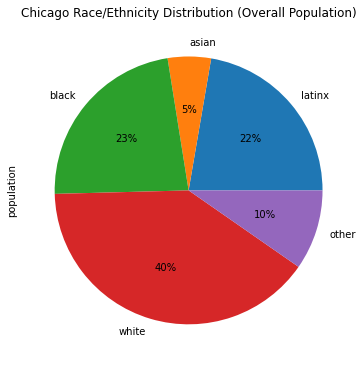

In [58]:
chicago_race_demo = covid_chicago_pop[['race','population']] 
chicago_race_demog=chicago_race_demo.set_index('race')
chicago_race_plot = chicago_race_demog.plot.pie(y='population', figsize=(6, 10), autopct='%1.0f%%',legend=False, title="Chicago Race/Ethnicity Distribution (Overall Population)")


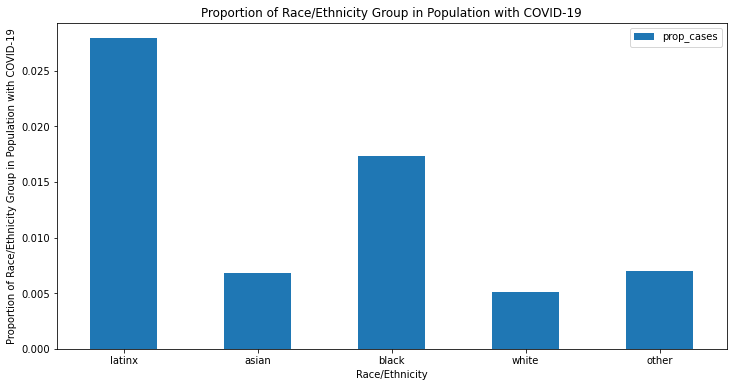

<Figure size 432x288 with 0 Axes>

In [80]:
import matplotlib.pyplot as plt

covid_per1000=covid_chicago_pop[['race','prop_cases']]


covid_per1000plot=covid_per1000.plot(x = 'race', kind="bar", figsize=(12,6), align="center", rot =0, title="Proportion of Race/Ethnicity Group in Population with COVID-19")
covid_per1000plot.set_xlabel("Race/Ethnicity")
covid_per1000plot.set_ylabel("Proportion of Race/Ethnicity Group in Population with COVID-19")

plt.show()
plt.tight_layout()


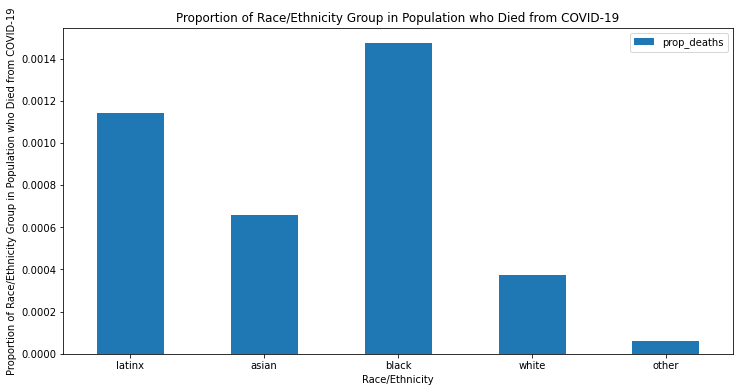

<Figure size 432x288 with 0 Axes>

In [81]:
import matplotlib.pyplot as plt

covid_per1000=covid_chicago_pop[['race','prop_deaths']]


covid_per1000plot=covid_per1000.plot(x = 'race', kind="bar", figsize=(12,6), align="center", rot =0, title="Proportion of Race/Ethnicity Group in Population who Died from COVID-19")
covid_per1000plot.set_xlabel("Race/Ethnicity")
covid_per1000plot.set_ylabel("Proportion of Race/Ethnicity Group in Population who Died from COVID-19")

plt.show()
plt.tight_layout()
